In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача 1

In [11]:
n = 3
M = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
f = np.sum(M, axis=1)
np.round(M, 2)

array([[1.  , 0.5 , 0.33],
       [0.5 , 0.33, 0.25],
       [0.33, 0.25, 0.2 ]])

In [230]:
def fast_descent_solve(M, f, eps):
    x = np.random.random(M.shape[0])
    
    step = 0
    while np.linalg.norm(M@x - f) > eps:
        r = M@x - f
        tau = np.dot(r,r) / np.dot(M@r,r)
        x = x - tau*r
        
        if np.linalg.norm(x) > 1e4 or step > 1e5:
            return x, -10
        
        step += 1
    return x, step

In [235]:
n = 4

M = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
f = np.sum(M, axis=1)

ans, step = fast_descent_solve(M, f, 1e-10)
step

32715

Как-то плохо сходится :(

# Задача 2

In [187]:
def conj_grad_solve(M, f, eps):
    def do_step0():
        x_  = np.random.random(n)
        s_  = M @ x_ - f

        x_b = x_
        s_b = s_
        r_b = s_
        return x_b, r_b, s_b
    
    def do_step(x_b, r_b, s_b):
        alpha_b = (r_b @ r_b) / (M @ s_b @ s_b)
        x_ = x_b - alpha_b * s_b
        r_ = r_b - alpha_b * M @ s_b

        beta_b = (r_ @ r_) / (r_b @ r_b)
        s_   = r_  + beta_b * s_b

        x_b = x_
        r_b = r_
        s_b = s_
    
        return x_b, r_b, s_b
    
    x_b, r_b, s_b = do_step0()
    
    step = 1
    while np.linalg.norm(M @ x_b - f) > eps:
        if step > 1e5 or np.linalg.norm(x_b) > 1e5:
            return x_b, -10
        step += 1
        x_b, r_b, s_b = do_step(x_b, r_b, s_b)
    return x_b, step

In [191]:
n = 1000

M = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
f = np.sum(M, axis=1)

ans, step = conj_grad_solve(M, f, 1e-10)
step

87

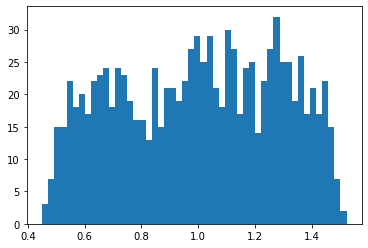

In [193]:
# матрица очень плохо обусловлена
plt.hist(ans, bins=50)
plt.show()

In [198]:
ns = range(100, 1000, 20)
rep = 10

steps = []
for n in ns:
    M = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
    f = np.sum(M, axis=1)
    
    step_ = 0
    for _ in range(rep):
        ans, step = conj_grad_solve(M, f, 1e-10)
        step_ += step
    steps.append(step_/rep)

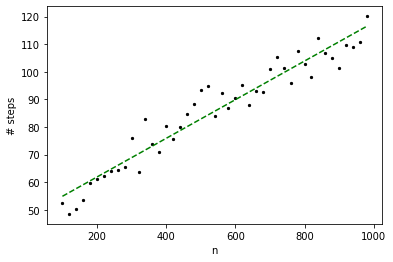

In [203]:
x = np.array(ns)
y = np.array(steps)

coeff = np.polyfit(x, y, 1)

plt.scatter(x, y, s=5, color="k")
plt.plot(x, np.poly1d(coeff)(x), "--", color="g")
plt.xlabel("n")
plt.ylabel("# steps")
plt.show()

Хорошо сходится!)

# Задача 3

In [265]:
n = 5;

M = np.random.random((n,n))
M = M.T @ M
f = np.random.random(n)

true_ans = np.linalg.solve(M, f)

ans, step = fast_descent_solve(M, f, 1e-7)
print(np.linalg.norm(ans-true_ans), step)

ans, step = conj_grad_solve(M, f, 1e-7)
print(np.linalg.norm(ans-true_ans), step)

0.0005585831302548457 66381
1.1269695660712672e-10 7


In [266]:
def fast_descent_solve_save_r(M, f, eps):
    x = np.random.random(M.shape[0])
    
    rs = []
    step = 0
    while np.linalg.norm(M@x - f) > eps:
        r = M@x - f
        rs.append(np.linalg.norm(r))
        tau = np.dot(r,r) / np.dot(M@r,r)
        x = x - tau*r
        
        if np.linalg.norm(x) > 1e4 or step > 1e5:
            return x, -10
        
        step += 1
    return x, step, rs

In [345]:
def conj_grad_solve_save_r(M, f, eps):
    def do_step0():
        x_  = np.random.random(n)
        s_  = M @ x_ - f

        x_b = x_
        s_b = s_
        r_b = s_
        return x_b, r_b, s_b
    
    def do_step(x_b, r_b, s_b):
        alpha_b = (r_b @ r_b) / (M @ s_b @ s_b)
        x_ = x_b - alpha_b * s_b
        r_ = r_b - alpha_b * M @ s_b

        beta_b = (r_ @ r_) / (r_b @ r_b)
        s_   = r_  + beta_b * s_b

        x_b = x_
        r_b = r_
        s_b = s_
    
        return x_b, r_b, s_b
    
    x_b, r_b, s_b = do_step0()
    
    rs = [np.linalg.norm(r_b)]
    step = 1
    while np.linalg.norm(M @ x_b - f) > eps:
        if step > 1e5 or np.linalg.norm(x_b) > 1e5:
            return x_b, -10, rs
        step += 1
        x_b, r_b, s_b = do_step(x_b, r_b, s_b)
        rs.append(np.linalg.norm(r_b))
    return x_b, step, rs

In [283]:
n = 10;

M = np.random.random((n,n))
M = M.T @ M
f = np.random.random(n)

true_ans = np.linalg.solve(M, f)

ans, step, rs1 = fast_descent_solve_save_r(M, f, 1e-7)
print(np.linalg.norm(ans-true_ans), step)

ans, step, rs2 = conj_grad_solve_save_r(M, f, 1e-7)
print(np.linalg.norm(ans-true_ans), step)

4.051330417045668e-06 3993
7.480729569599828e-10 12


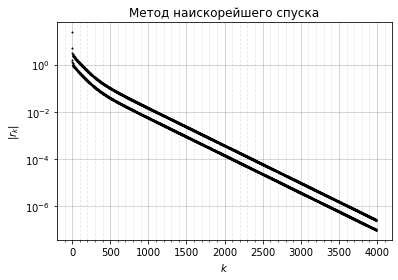

In [291]:
x = np.array(np.arange(len(rs1)))
y = rs1

fig, ax = plt.subplots()
plt.title("Метод наискорейшего спуска")
plt.scatter(x, y, s=1, color="k")
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
ax.set_yscale("log")
plt.xlabel("$k$")
plt.ylabel("$\\|r_k\\|$")
plt.show()

In [346]:
n = 500;
rep = 20
rs_av = np.zeros(2000)

for _ in range(rep):
    M = np.random.random((n,n))
    M = M.T @ M
    f = np.random.random(n)

    ans, step, rs2 = conj_grad_solve_save_r(M, f, 1e-7)
    rs2 = np.array(rs2)
    rs_av[:rs2.shape[0]] += rs2/rep

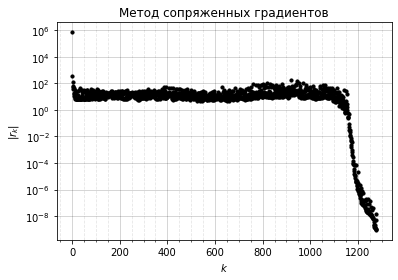

In [347]:
border = (rs_av==0).argmax()
x = np.array(np.arange(border))
y = rs_av[:border]

fig, ax = plt.subplots()
plt.title("Метод сопряженных градиентов")
plt.scatter(x, y, s=10, color="k")
# plt.plot(x, y, color="k")
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
ax.set_yscale("log")
plt.xlabel("$k$")
plt.ylabel("$\\|r_k\\|$")
plt.show()

# Задача 4

Как мы поняли, метод сопряженных градиентов сходится ощутимо быстрее. 
Более того в $n$-мерии он по идее сходится за $O(n)$ шагов, что и наблюдаем на второй картинке, откуда делаем вывод, что там метод сопряженных градиентов.

Также на первой картинке дижение происходит нормально линиям уровня, а значит там скорее метод наискорейшего спуска.

Замкнутые линии изображают линии уровня, градиент им нормален.

## Метод сопряженных  градиентов

__Теорема__. Для функции, вида
$$
F(x) = \frac{1}{2} \langle A x | x\rangle - \langle b | x \rangle,
$$
где $A^{\text{T}} = A$, $\dim A = n$  и $A > 0$, метод сопряженных коэффициентов сходится не более, чем за $n$ шагов.

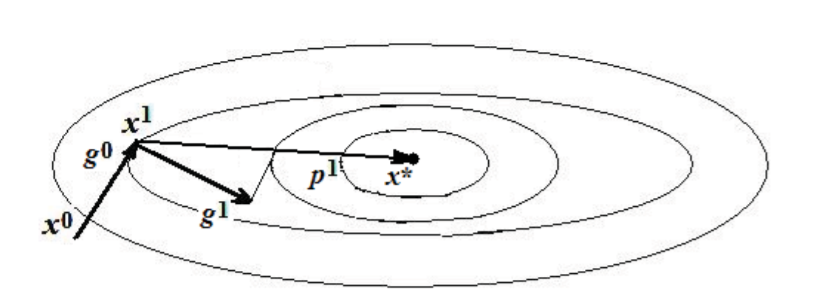

In [214]:
from IPython.display import Image
Image("1.png")

_геометрическое показательство_ : есть $n$-мерное пространство, делая $n$ шагов нормальных предыдущим, сохраняя для квадратичной функции нормальность ко всем предыдущим направлениям на необходимое (в силу **унимодальности** квадратичной функции), мы гарантировано окажемся в оптимуме.

Таким образом метод сопряженных градиентов сходится не более, чем за $n$ шагов, _Q. E. D._

# Задача 5